In [3]:
import pandas as pd
import os

In [2]:
import seaborn as sns

In [136]:
data_dir = "./data/"
dataset = './data/tuples/autovac/autovacon_tpcc_scale_50_worktime_3600_samplefreq_1_tsizeAnddeadtuple_pgconfig_delete_25_dead_tup_dtw.csv'

In [137]:
df = pd.read_csv(dataset)

In [138]:
df.head()

,ds,table_name,pg_stat_get_live_tuples,pg_stat_get_dead_tuples,pg_table_size,relid,schemaname,relname,seq_scan,seq_tup_read,...,n_mod_since_analyze,n_ins_since_vacuum,last_vacuum,last_autovacuum,last_analyze,last_autoanalyze,vacuum_count,autovacuum_count,analyze_count,autoanalyze_count
0,1.650453e+09,public.customer,1494127,0,929644544,17256,public,customer,2,0,...,14000,114928,NaN,2022-04-20 11:05:57.949486+00:00,NaN,2022-04-20 11:06:56.821568+00:00,0,8,0,11
1,1.650453e+09,public.district,500,0,90112,17246,public,district,1,0,...,70,500,NaN,NaN,NaN,2022-04-20 11:04:56.270737+00:00,0,0,0,5
2,1.650453e+09,public.history,1500000,0,129490944,17269,public,history,0,0,...,150000,150000,NaN,2022-04-20 11:05:58.272156+00:00,NaN,2022-04-20 11:05:58.791119+00:00,0,8,0,10
3,1.650453e+09,public.item,100000,0,10436608,17226,public,item,1,0,...,0,0,NaN,2022-04-20 10:53:54.434445+00:00,NaN,2022-04-20 10:53:54.655509+00:00,0,1,0,1
4,1.650453e+09,public.new_order,450000,0,19972096,17296,public,new_order,1,0,...,9000,81000,NaN,2022-04-20 11:04:58.086072+00:00,NaN,2022-04-20 11:06:57.253312+00:00,0,8,0,10


In [139]:
df.table_name.unique()

array(['public.customer', 'public.district', 'public.history',
       'public.item', 'public.new_order', 'public.oorder',
       'public.order_line', 'public.stock', 'public.warehouse'],
      dtype=object)

In [140]:
df.columns

Index(['ds', 'table_name', 'pg_stat_get_live_tuples',
       'pg_stat_get_dead_tuples', 'pg_table_size', 'relid', 'schemaname',
       'relname', 'seq_scan', 'seq_tup_read', 'idx_scan', 'idx_tup_fetch',
       'n_tup_ins', 'n_tup_upd', 'n_tup_del', 'n_tup_hot_upd', 'n_live_tup',
       'n_dead_tup', 'n_mod_since_analyze', 'n_ins_since_vacuum',
       'last_vacuum', 'last_autovacuum', 'last_analyze', 'last_autoanalyze',
       'vacuum_count', 'autovacuum_count', 'analyze_count',
       'autoanalyze_count'],
      dtype='object')

In [141]:
df['ds'] = df['ds']-df['ds'].min()
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [142]:
def plot_growth(df, col):
    return sns.lineplot(data=df, x='ds', y=col, hue='table_name')

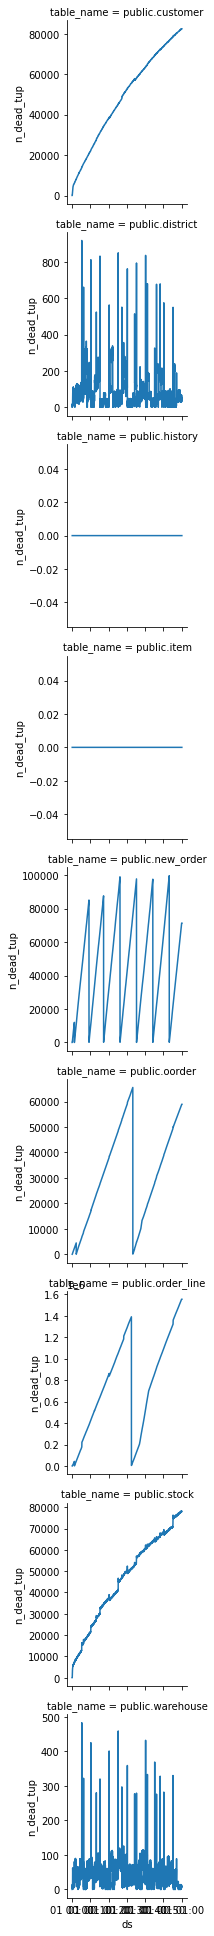

In [143]:
g = sns.FacetGrid(df, row='table_name', sharey=False)
g.map(sns.lineplot, "ds", "n_dead_tup")

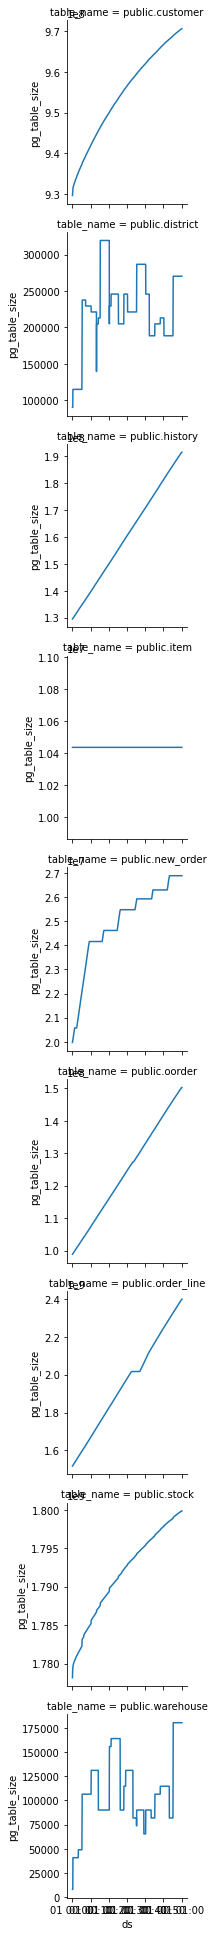

In [144]:
g2 = sns.FacetGrid(df, row='table_name', sharey=False)
g2.map(sns.lineplot, "ds", "pg_table_size")

<AxesSubplot:xlabel='ds', ylabel='pg_table_size'>

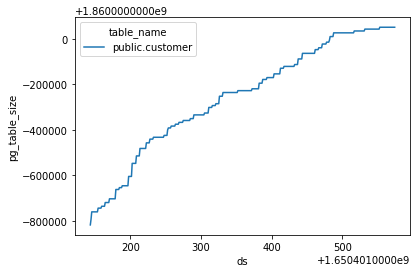

In [134]:
plot_growth(df[df['table_name'] == 'public.customer'].copy(), 'pg_table_size')

<AxesSubplot:xlabel='ds', ylabel='n_dead_tup'>

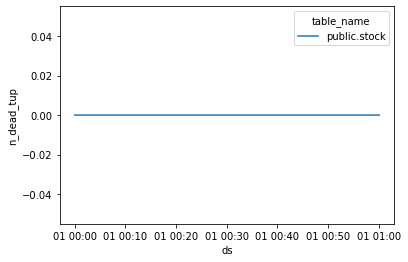

In [105]:
plot_growth(df[df['table_name'] == 'public.stock'].copy(), 'n_dead_tup')